In [57]:
# import packages
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import numpy as np

In [58]:
# read in csv
dog = pd.read_excel("USMassShootings.xlsx")# view datatypes
dog.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CASE                       71 non-null     object 
 1   GENDER                     71 non-null     object 
 2   SHOOTINGTYPE               71 non-null     object 
 3   RACE                       71 non-null     object 
 4   LOCATION                   71 non-null     object 
 5   STATE                      71 non-null     object 
 6   DATE                       71 non-null     object 
 7   YEAR                       71 non-null     int64  
 8   SUMMARY                    71 non-null     object 
 9   FATALITIES                 71 non-null     int64  
 10  WOUNDED                    71 non-null     int64  
 11  TOTALVICTIMS               71 non-null     int64  
 12  LOCATIONTYPE               71 non-null     object 
 13  PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 

In [59]:
# increase index by +1
dog['Number'] = dog.index + 1


In [60]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [61]:
dog.head()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE,Number
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Yes,"Abdulazeez ""had suffered for years from depres...",Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821,1
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,No,NaN,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144,2
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,No,"Fryberg was well-liked and allegedly happy, bu...",No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918,3
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,No,NaN,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236,4
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,8,20,Military,Yes,Had told Rhode Island police the prior month t...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530,5


In [62]:
dog.LOCATIONTYPE.value_counts()

Other        30
Workplace    20
School       13
Religious     4
Military      4
Name: LOCATIONTYPE, dtype: int64

In [63]:
dog.NUMWEAPONS.value_counts()

1    30
2    18
3    12
4     7
5     2
9     1
7     1
Name: NUMWEAPONS, dtype: int64

In [64]:
dog.WEAPONSOBTAINEDLEGALLY.value_counts()

Yes    56
No     13
Name: WEAPONSOBTAINEDLEGALLY, dtype: int64

In [65]:
dog.ASSAULT.value_counts()

No     55
Yes    16
Name: ASSAULT, dtype: int64

In [66]:
dog.SHOOTINGTYPE.value_counts()

Mass     63
Spree     8
Name: SHOOTINGTYPE, dtype: int64

In [67]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CASE                       71 non-null     object 
 1   GENDER                     71 non-null     object 
 2   SHOOTINGTYPE               71 non-null     object 
 3   RACE                       71 non-null     object 
 4   LOCATION                   71 non-null     object 
 5   STATE                      71 non-null     object 
 6   DATE                       71 non-null     object 
 7   YEAR                       71 non-null     int64  
 8   SUMMARY                    71 non-null     object 
 9   FATALITIES                 71 non-null     int64  
 10  WOUNDED                    71 non-null     int64  
 11  TOTALVICTIMS               71 non-null     int64  
 12  LOCATIONTYPE               71 non-null     object 
 13  PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 

In [68]:
dog.head(35)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE,Number
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Yes,"Abdulazeez ""had suffered for years from depres...",Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821,1
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,No,NaN,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144,2
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,No,"Fryberg was well-liked and allegedly happy, bu...",No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918,3
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,No,NaN,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236,4
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,8,20,Military,Yes,Had told Rhode Island police the prior month t...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530,5
5,Hialeah apartment shooting,Male,Mass,Latino,"Hialeah, Florida",Florida,7/26/2013,2013,"Pedro Vargas, 42, set fire to his apartment, k...",7,0,7,Other,Yes,His mother told authorities her son had been a...,Yes,Florida Gun Center,9mm semi-automatic handgun,1,No,Glock 17,http://www.miamiherald.com/2013/07/27/v-print/...,http://www.miamiherald.com/2013/08/03/v-print/...,25.867010,-80.291466,6
6,Santa Monica rampage,Male,Spree,White,"Santa Monica, California",California,6/7/2013,2013,"John Zawahri, 23, armed with a homemade assaul...",6,3,9,Other,Yes,He was known as a solitary teen who regularly ...,Yes,Assembled a rifle out of component parts.,"Assault rifle, high capacity magazines, antiqu...",2,Yes,".223-caliber semi-automatic assault rifle, abo...",http://www.cbsnews.com/8301-504083_162-5758932...,http://www.cbsnews.com/8301-504083_162-5758932...,34.008617,-118.494751,7
7,Pinewood Village Apartment shooting,Male,Mass,Black,"Federal Way, Washington",Washington,4/21/2013,2013,"Dennis Clark III, 27, shot and killed his girl...",5,0,5,Other,No,NaN,Yes,Unknown,"Semiautomatic handgun, shotgun",2,No,".40 caliber semi-automatic handgun, pistol gri...",http://seattletimes.com/html/localnews/2020836...,NaN,47.312962,-122.339363,8
8,Mohawk Valley shootings,Male,Spree,White,"Herkimer County, New York",New York,3/13/2013,2013,"Kurt Myers, 64, shot six people in neighboring...",5,2,7,Other,No,NaN,Yes,"Frank's Guns in Marcy, NY",Shotgun,1,No,Unknown,https://www.nyspnews.com/article_display.cfm?a...,http://poststar.com/news/local/state-and-regio...,43.045601,-74.984894,9
9,Newtown school shooting,Male,Mass,White,"Newtown, C

In [69]:
dog.describe()

,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,NUMWEAPONS,LATITUDE,LONGITUDE,Number
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2002.112676,8.042254,7.225352,15.267606,2.197183,37.815320,-96.953730,36.000000
std,9.337404,5.349063,9.859292,12.681773,1.508260,6.074233,18.837319,20.639767
min,1982.000000,4.000000,0.000000,5.000000,1.000000,21.325512,-157.847305,1.000000
25%,1993.500000,5.000000,1.000000,7.000000,1.000000,33.745138,-117.750736,18.500000
50%,2005.000000,6.000000,3.000000,11.000000,2.000000,38.583385,-90.668259,36.000000
75%,2011.000000,8.500000,8.000000,18.500000,3.000000,41.915030,-81.149307,53.500000
max,2015.000000,33.000000,58.000000,70.000000,9.000000,48.050823,-71.072830,71.000000


In [70]:
df = dog.drop(dog.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], axis=1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TOTALVICTIMS               71 non-null     int64 
 1   LOCATIONTYPE               71 non-null     object
 2   PRIORSIGNSOFMENTALILLNESS  71 non-null     object
 3   Number                     71 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


In [72]:
df.describe()

,TOTALVICTIMS,Number
count,71.000000,71.000000
mean,15.267606,36.000000
std,12.681773,20.639767
min,5.000000,1.000000
25%,7.000000,18.500000
50%,11.000000,36.000000
75%,18.500000,53.500000
max,70.000000,71.000000


In [73]:
df.LOCATIONTYPE.value_counts()

Other        30
Workplace    20
School       13
Religious     4
Military      4
Name: LOCATIONTYPE, dtype: int64

In [74]:
dog.NUMWEAPONS.value_counts()

1    30
2    18
3    12
4     7
5     2
9     1
7     1
Name: NUMWEAPONS, dtype: int64

In [75]:
# changing data type of ALTER column to integers from strings
def ALTER(acc):
    if acc == 'Other':
        return 1.0
    elif acc == 'Workplace':
        return 2.0
    elif acc == 'School':
        return 3.0
    elif acc == 'Military':
        return 4.0
    elif acc == 'Religious':
        return 5.0
    else:
        return 0

df["LOCATIONTYPE"] = df["LOCATIONTYPE"].apply(ALTER)

In [76]:
# checking to see if data type conversion was successful; it was.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TOTALVICTIMS               71 non-null     int64  
 1   LOCATIONTYPE               71 non-null     float64
 2   PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 3   Number                     71 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [77]:
# only using first 30 rows
df2 = df.head(30)

In [78]:
# checking new shortened dataframe
df2.head(30)

,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,Number
0,7,4.0,Yes,1
1,10,5.0,No,2
2,6,3.0,No,3
3,6,1.0,No,4
4,20,4.0,Yes,5
5,7,1.0,Yes,6
6,9,1.0,Yes,7
7,5,1.0,No,8
8,7,1.0,No,9
9,30,3.0,Yes,10


In [79]:
# checking data types of new DF
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TOTALVICTIMS               30 non-null     int64  
 1   LOCATIONTYPE               30 non-null     float64
 2   PRIORSIGNSOFMENTALILLNESS  30 non-null     object 
 3   Number                     30 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ KB


In [80]:
# Changing Number column to an index starting at 1, not 0
df2['Number'] = df2.index + 1

<ipython-input-80-d807eaf3c4a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Number'] = df2.index + 1


In [81]:
# viewing df2
print(df2)

    TOTALVICTIMS  LOCATIONTYPE PRIORSIGNSOFMENTALILLNESS  Number
0              7           4.0                       Yes       1
1             10           5.0                        No       2
2              6           3.0                        No       3
3              6           1.0                        No       4
4             20           4.0                       Yes       5
5              7           1.0                       Yes       6
6              9           1.0                       Yes       7
7              5           1.0                        No       8
8              7           1.0                        No       9
9             30           3.0                       Yes      10
10             8           2.0                       Yes      11
11            10           5.0                       Yes      12
12            70           1.0                       Yes      13
13             7           1.0                       Yes      14
14            10         

In [82]:
X = df.drop('PRIORSIGNSOFMENTALILLNESS',axis=1).values
y = df['PRIORSIGNSOFMENTALILLNESS'].values

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

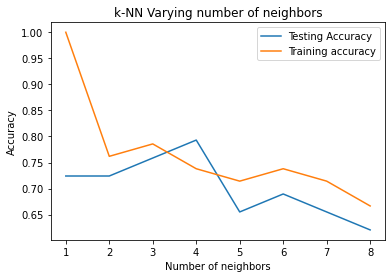

In [85]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=6)


In [87]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [88]:
knn.score(X_test,y_test)

0.6896551724137931

In [89]:
from sklearn.metrics import confusion_matrix


In [90]:
y_pred = knn.predict(X_test)


In [91]:
confusion_matrix(y_test,y_pred)


array([[ 3,  6],
       [ 3, 17]])

In [92]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,No,Yes,All
True,,,
No,3,6,9
Yes,3,17,20
All,6,23,29


In [93]:
#import classification_report
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          No       0.50      0.33      0.40         9
         Yes       0.74      0.85      0.79        20

    accuracy                           0.69        29
   macro avg       0.62      0.59      0.60        29
weighted avg       0.66      0.69      0.67        29



In [95]:
y_pred_proba = knn.predict_proba(X_test)[:,1]


In [96]:
from sklearn.metrics import roc_curve


In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)

In [100]:
from sklearn.model_selection import GridSearchCV


In [101]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [102]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [103]:
knn_cv.best_score_


0.719047619047619

In [108]:
knn_cv.best_params_
k = knn_cv.best_params_

In [109]:
print(f"The optimal k value is {k}.")

The optimal k value is {'n_neighbors': 9}.


In [107]:
print(f"The AUC value is: {auc}.")

The AUC value is: 0.7.
